# Data Analysis

This notebook is used to analyze the model behaviour


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

os.chdir('c:\\Users\\yixin\\Desktop\\Workspace\\University\\MSc\\Year 2\\MSc Thesis Project\\Codes\\MSc_AI_thesis')
print(os.getcwd())

from utils import * 

os.chdir('c:\\Users\\yixin\\Desktop\\Workspace\\University\\MSc\\Year 2\\MSc Thesis Project\\Codes\\MSc_AI_thesis\\results')
print(os.getcwd())


c:\Users\yixin\Desktop\Workspace\University\MSc\Year 2\MSc Thesis Project\Codes\MSc_AI_thesis
c:\Users\yixin\Desktop\Workspace\University\MSc\Year 2\MSc Thesis Project\Codes\MSc_AI_thesis\results


In [2]:
baseline_results = [result_csv for result_csv in os.listdir(os.getcwd()) if result_csv.startswith("ProtoPNet")]
resnet18_results = [result_csv for result_csv in baseline_results if "resnet18" in result_csv]
vgg16_results = [result_csv for result_csv in baseline_results if "vgg16" in result_csv]

for baseline_result in baseline_results:
    print(baseline_result)


ProtoPNet_resnet18_80train-20test-0.0001lr-10classes-20prototypes.csv
ProtoPNet_resnet18_80train-20test-0.0001lr-10classes-30prototypes.csv
ProtoPNet_resnet18_80train-20test-0.0001lr-5classes-20prototypes.csv
ProtoPNet_resnet18_80train-20test-0.0005lr-5classes-20prototypes.csv
ProtoPNet_resnet18_80train-20test-001lr.csv
ProtoPNet_vgg16_5way_20shot_results.csv
ProtoPNet_vgg16_80train-20test-0.0001lr-10classes-20prototypes.csv
ProtoPNet_vgg16_80train-20test-0.0001lr-10classes-30prototypes.csv
ProtoPNet_vgg16_80train-20test-0.0001lr-20classes-10prototypes.csv
ProtoPNet_vgg16_80train-20test-0.0001lr-20classes-20prototypes.csv
ProtoPNet_vgg16_80train-20test-0.0001lr-5classes-20prototypes.csv
ProtoPNet_vgg16_80train-20test-0.0005lr-10classes-20prototypes.csv
ProtoPNet_vgg16_80train-20test-0.0005lr-10classes-30prototypes.csv
ProtoPNet_vgg16_80train-20test-0.0005lr-5classes-20prototypes.csv
ProtoPNet_vgg16_80train-20test-0.005lr-5classes-20prototypes.csv
ProtoPNet_vgg16_80train-20test-005lr.cs

In [3]:
## Used to fix the data column names. No need to run again.

# for csv in baseline_results:
#     result_name = csv
#     result = pd.read_csv(csv)
#     if len(result.columns) == 11:
#         # There are some inconsistencies in the data column names. We shall fix that first.
#         # Train Accuracy shall be Accuracy, L1 shall be at Test Accuracy, abd P Avg Pair Dist shall be at L1
#         result.rename(columns={'Train Accuracy': 'Accuracy', 'Test Accuracy': 'L1', 'L1': 'P Avg Pair Dist'}, inplace=True)
    
#     # After that, resave the csv
#     if 'P Avg Pair Dist.1' in result.columns:
#         result.drop(columns=['P Avg Pair Dist.1'], inplace=True)
#     result.to_csv(result_name, index=False)



## 1. Unimodal
### 1.1 5-way 20-shot VS 80-20 split
Prototype Number was 10 and number of classes was 5 by default



In [4]:
fiveway20shot = pd.read_csv('ProtoPNet_vgg16_5way_20shot_results.csv')
print(fiveway20shot.columns)
print(fiveway20shot.head())
print(f"best achievement: {fiveway20shot['Test Accuracy'].max()} \
      at epoch {fiveway20shot['Epoch'].loc[fiveway20shot['Test Accuracy'].idxmax()]}")


Index(['Epoch', 'Train Accuracy', 'Test Accuracy'], dtype='object')
   Epoch  Train Accuracy  Test Accuracy
0      1        0.154639       0.221649
1      2        0.175258       0.231959
2      3        0.226804       0.242268
3      4        0.185567       0.177835
4      5        0.195876       0.219072
best achievement: 0.306701030927835       at epoch 57


In [5]:
eighty20split = pd.read_csv("ProtoPNet_vgg16_80train-20test_results.csv")
print(eighty20split.columns)
print(eighty20split.head())
print(f"best achievement: {eighty20split['Test Accuracy'].max()} \
      at epoch {eighty20split['Epoch'].loc[eighty20split['Test Accuracy'].idxmax()]}")

Index(['Epoch', 'Train Accuracy', 'Test Accuracy'], dtype='object')
   Epoch  Train Accuracy  Test Accuracy
0      1        0.265799       0.270073
1      2        0.249071       0.262774
2      3        0.254647       0.197080
3      4        0.271375       0.255474
4      5        0.275093       0.379562
best achievement: 0.4817518248175182       at epoch 49


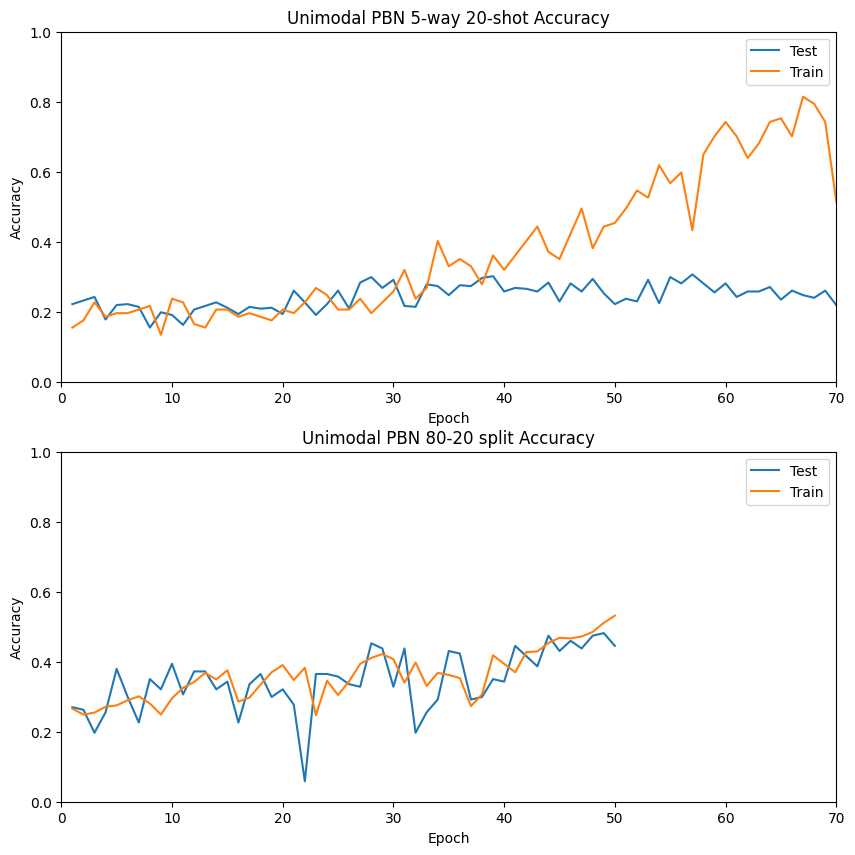

In [6]:
fig, ax = plt.subplots(2,1, figsize=(10,10))

plt_5way20shot = 'unimodal5way20shot_accuracy.png'
ax[0].plot(fiveway20shot['Epoch'], fiveway20shot['Test Accuracy'], label='Test')
ax[0].plot(fiveway20shot['Epoch'], fiveway20shot['Train Accuracy'], label='Train')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Unimodal PBN 5-way 20-shot Accuracy')
ax[0].set_ylim(0,1)
ax[0].set_xlim(0,70)
ax[0].legend()

plt_8020split = 'unimodal_8020split_accuracy.png'
ax[1].plot(eighty20split['Epoch'], eighty20split['Test Accuracy'], label='Test')
ax[1].plot(eighty20split['Epoch'], eighty20split['Train Accuracy'], label='Train')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_ylim(0,1)
ax[1].set_xlim(0,70)
ax[1].set_title('Unimodal PBN 80-20 split Accuracy')
ax[1].legend()

# fig.savefig("../plots/unimodal/few shot VS 80-20 split.png")
plt.show()


In [7]:
## Used to fix the data column names. No need to run again.

# for csv in baseline_results:
#     result_name = csv
#     result = pd.read_csv(csv)
#     if len(result.columns) == 11:
#         # There are some inconsistencies in the data column names. We shall fix that first.
#         # Train Accuracy shall be Accuracy, L1 shall be at Test Accuracy, abd P Avg Pair Dist shall be at L1
#         result.rename(columns={'Train Accuracy': 'Accuracy', 'Test Accuracy': 'L1', 'L1': 'P Avg Pair Dist'}, inplace=True)
    
#     # After that, resave the csv
#     if 'P Avg Pair Dist.1' in result.columns:
#         result.drop(columns=['P Avg Pair Dist.1'], inplace=True)
#     result.to_csv(result_name, index=False)



### 1.2 Models with large learning rates (0.005 and 0.001)
**Prototoye numbers are _10_ by default**

['ProtoPNet_resnet18_80train-20test-0.0001lr-10classes-20prototypes.csv', 'ProtoPNet_resnet18_80train-20test-0.0001lr-10classes-30prototypes.csv', 'ProtoPNet_resnet18_80train-20test-0.0001lr-5classes-20prototypes.csv', 'ProtoPNet_resnet18_80train-20test-0.0005lr-5classes-20prototypes.csv', 'ProtoPNet_resnet18_80train-20test-001lr.csv', 'ProtoPNet_vgg16_5way_20shot_results.csv', 'ProtoPNet_vgg16_80train-20test-0.0001lr-10classes-20prototypes.csv', 'ProtoPNet_vgg16_80train-20test-0.0001lr-10classes-30prototypes.csv', 'ProtoPNet_vgg16_80train-20test-0.0001lr-20classes-10prototypes.csv', 'ProtoPNet_vgg16_80train-20test-0.0001lr-20classes-20prototypes.csv', 'ProtoPNet_vgg16_80train-20test-0.0001lr-5classes-20prototypes.csv', 'ProtoPNet_vgg16_80train-20test-0.0005lr-10classes-20prototypes.csv', 'ProtoPNet_vgg16_80train-20test-0.0005lr-10classes-30prototypes.csv', 'ProtoPNet_vgg16_80train-20test-0.0005lr-5classes-20prototypes.csv', 'ProtoPNet_vgg16_80train-20test-0.005lr-5classes-20prototypes

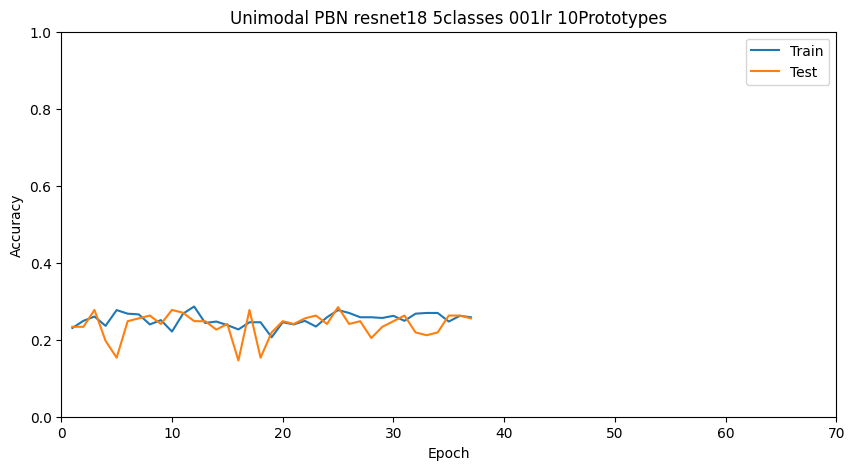

Index(['Epoch', 'Mode', 'Time', 'Cross Entropy', 'Cluster', 'Separation',
       'Avg Separation', 'Accuracy', 'P Avg Pair Dist'],
      dtype='object')
Model name: Unimodal PBN vgg16 5classes 0.005lr 10Prototypes


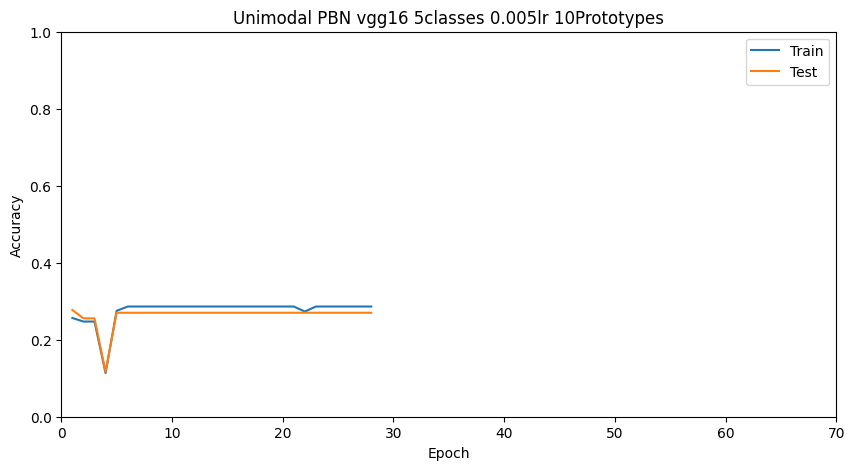

Index(['Epoch', 'Mode', 'Time', 'Cross Entropy', 'Cluster', 'Separation',
       'Avg Separation', 'Accuracy', 'P Avg Pair Dist'],
      dtype='object')


In [8]:
# the format of this result is a bit screwed up - we will skip this one and analyze it later
baseline_results_no_exception = baseline_results.copy()
baseline_results_no_exception.remove("ProtoPNet_vgg16_80train-20test-005lr.csv")
print(baseline_results_no_exception)

for baseline_result in baseline_results_no_exception:
    if any(['-005lr' in baseline_result, '-001lr' in baseline_result, "-0.005lr" in baseline_result]):

        encoder = baseline_result.split("_")[1]
        lr = baseline_result.split("-")[2].replace(".csv", "")
        if "classes" in baseline_result:
            num_class = baseline_result.split("-")[3]
        else:
            num_class = "5classes"      
        if ".csv" in num_class:
            num_class = num_class.replace(".csv", "")

        model_name = f"Unimodal PBN {encoder} {num_class} {lr} 10Prototypes"

        print(f"Model name: {model_name}")

        baseline_result_csv = pd.read_csv(baseline_result)

        train_accuracy = get_accuracy(baseline_result_csv, 'train')
        test_accuracy = get_accuracy(baseline_result_csv, 'test')

        # print(f"Model name: {model_name}")
        # print(f"Train Accuracy per epoch: {train_accuracy}")
        # print(f"Test Accuracy per epoch: {test_accuracy}")
        # print(" ")

        # print(len(train_accuracy))
        # print(len(test_accuracy))
        
        plt.figure(figsize=(10, 5))
        num_epochs = list(range(1, len(train_accuracy) + 1)) # Set up manually because early stopping applied for many tests, and actual num_epochs executed are vary.
        plt.plot(num_epochs, train_accuracy, label='Train')
        plt.plot(num_epochs, test_accuracy, label='Test')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.xlim(0,70)
        plt.ylim(0,1)
        plt.title(model_name)
        plt.legend()
        # plt.savefig(f'../plots/unimodal/{model_name}.png')
        plt.show()     
        print(baseline_result_csv.columns)

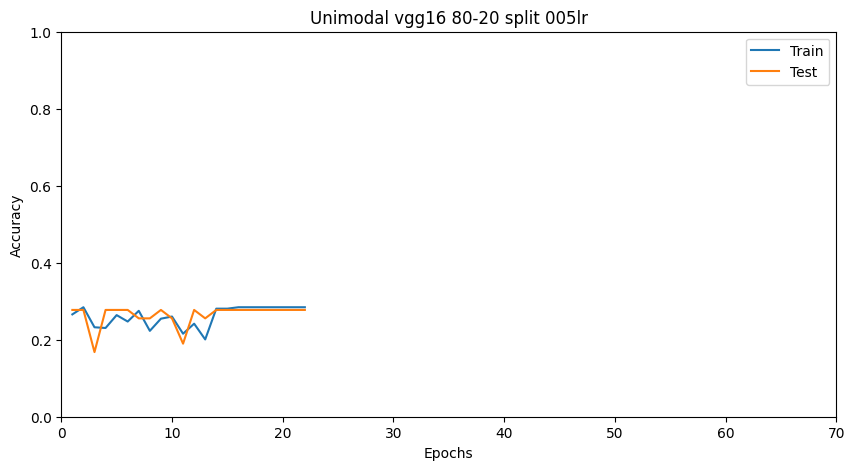

In [9]:
high_lr_special = pd.read_csv("ProtoPNet_vgg16_80train-20test-005lr.csv")
# print(high_lr_special.head())
# print(high_lr_special.columns)

high_lr_special_train = [accu / 100 for accu in high_lr_special["train_accu"]]
high_lr_special_test = [accu / 100 for accu in high_lr_special["test_accu"]]

plt.figure(figsize=(10,5))
num_epochs = list(range(1, len(high_lr_special_train)+1))
plt.plot(num_epochs, high_lr_special_train, label="Train")
plt.plot(num_epochs, high_lr_special_test, label="Test")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xlim(0,70)
plt.ylim(0,1)
plt.title("Unimodal vgg16 80-20 split 005lr")
plt.legend()
# plt.savefig("unimodal_vgg16_8020split_005lr.png")
plt.show()

### 1.3 Models with low learning rates (properly trained)



In [10]:
low_lr_results = [res for res in baseline_results if any([
    "-0.0001lr-" in res, 
    "-0.0005lr-" in res])]

low_lr_5classes_results = [res for res in low_lr_results if "-5classes-" in res]

low_lr_10classes_results = [res for res in low_lr_results if "-10classes-" in res]

low_lr_20classes_results = [res for res in low_lr_results if "-20classes-" in res]

In [11]:
# # Used to fix the column names (spelling error) in the result csv. No need to run again.
# for low_lr_result in low_lr_results:
#     result_name = low_lr_result
#     result = pd.read_csv(low_lr_result)
#     result.rename(columns={' Accuracy': 'Accuracy'}, inplace=True)
#     result.to_csv(result_name, index=False)

['ProtoPNet_resnet18_80train-20test-0.0001lr-10classes-20prototypes.csv',
 'ProtoPNet_resnet18_80train-20test-0.0001lr-10classes-30prototypes.csv',
 'ProtoPNet_resnet18_80train-20test-0.0001lr-5classes-20prototypes.csv',
 'ProtoPNet_resnet18_80train-20test-0.0005lr-5classes-20prototypes.csv',
 'ProtoPNet_vgg16_80train-20test-0.0001lr-10classes-20prototypes.csv',
 'ProtoPNet_vgg16_80train-20test-0.0001lr-10classes-30prototypes.csv',
 'ProtoPNet_vgg16_80train-20test-0.0001lr-20classes-10prototypes.csv',
 'ProtoPNet_vgg16_80train-20test-0.0001lr-20classes-20prototypes.csv',
 'ProtoPNet_vgg16_80train-20test-0.0001lr-5classes-20prototypes.csv',
 'ProtoPNet_vgg16_80train-20test-0.0005lr-10classes-20prototypes.csv',
 'ProtoPNet_vgg16_80train-20test-0.0005lr-10classes-30prototypes.csv',
 'ProtoPNet_vgg16_80train-20test-0.0005lr-5classes-20prototypes.csv']

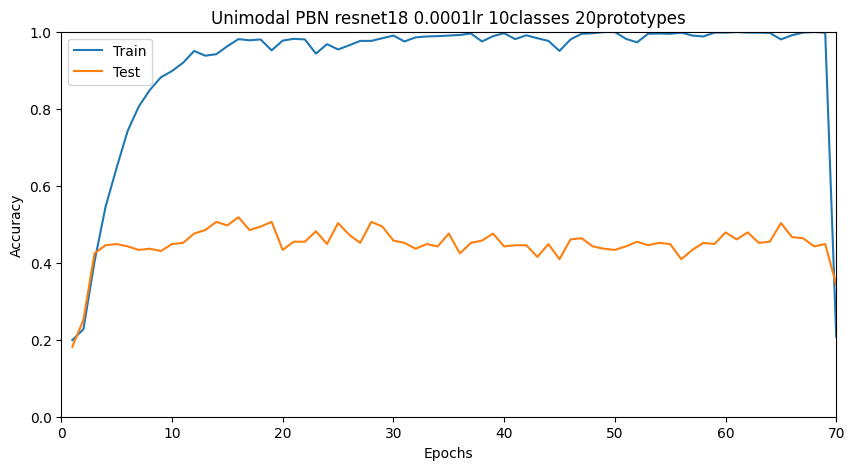

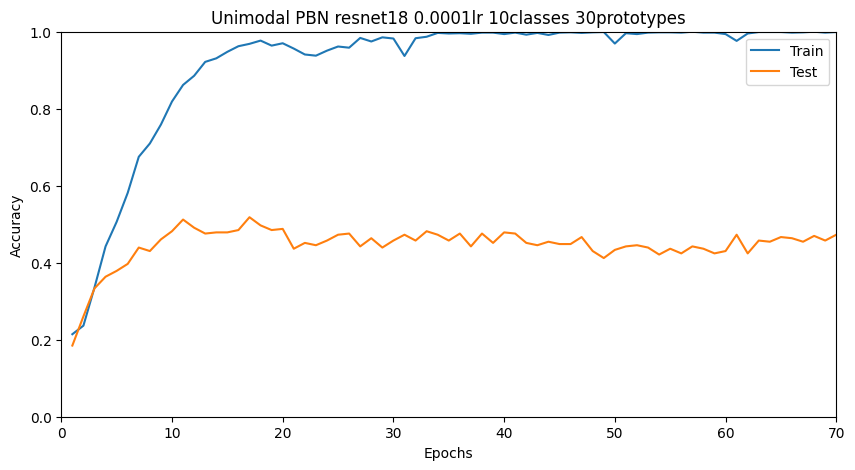

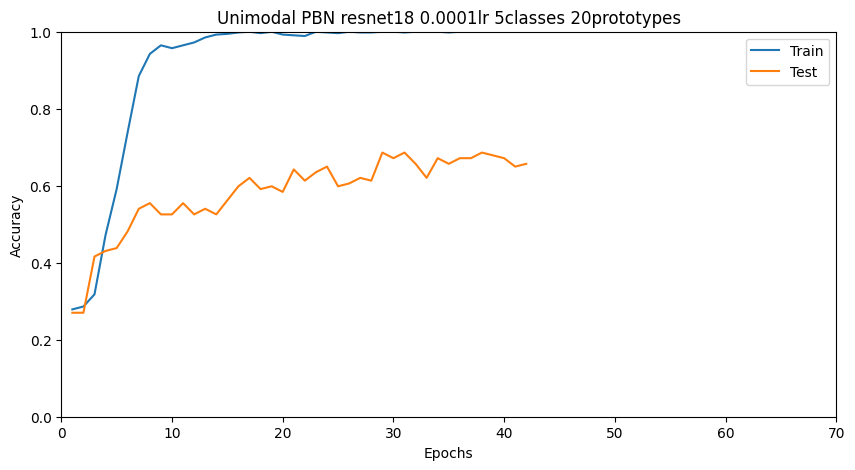

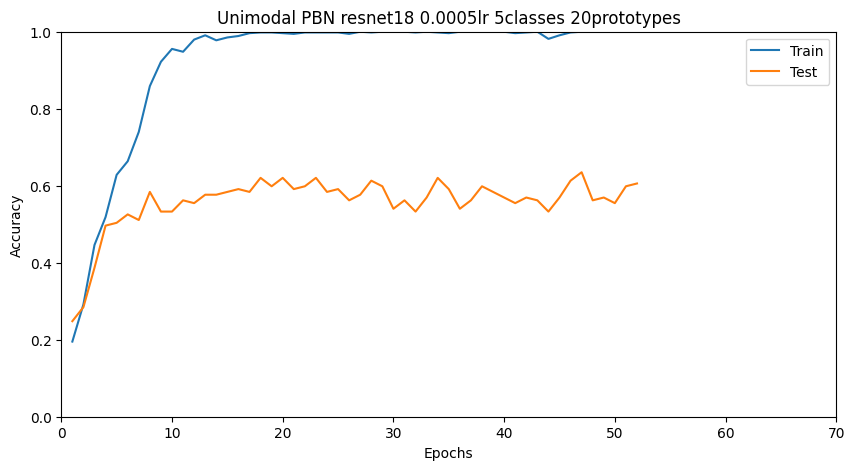

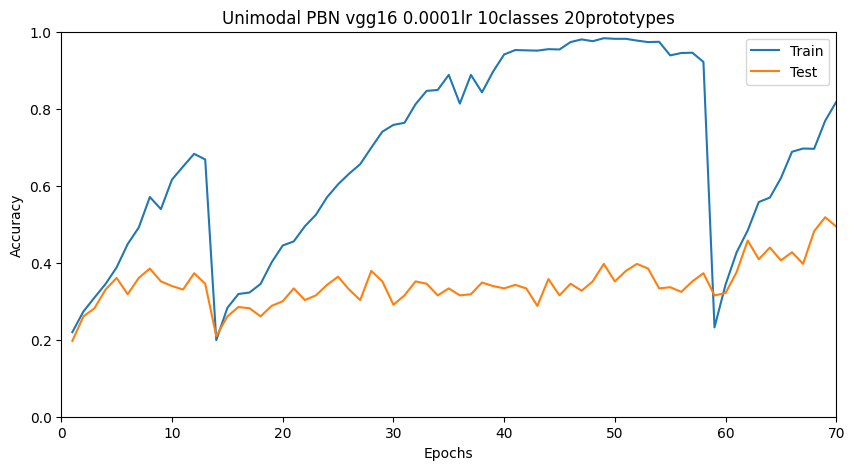

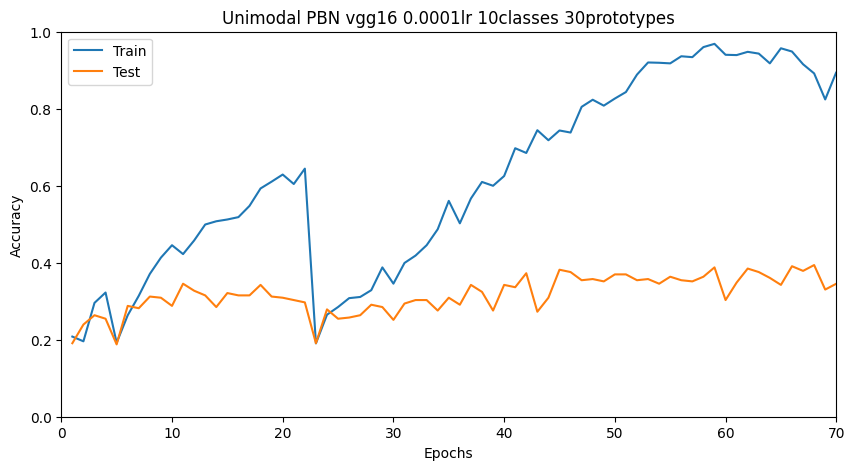

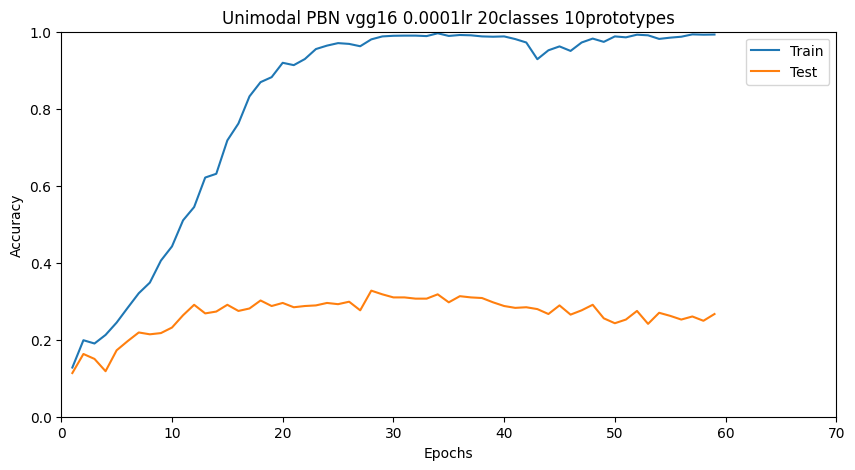

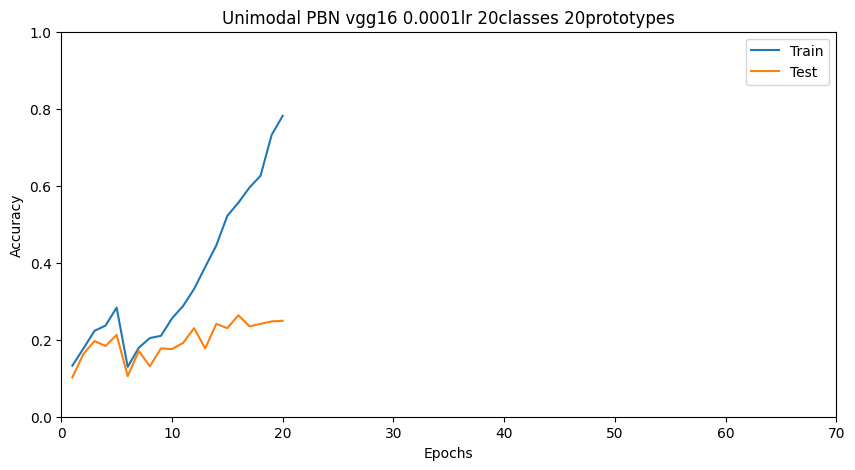

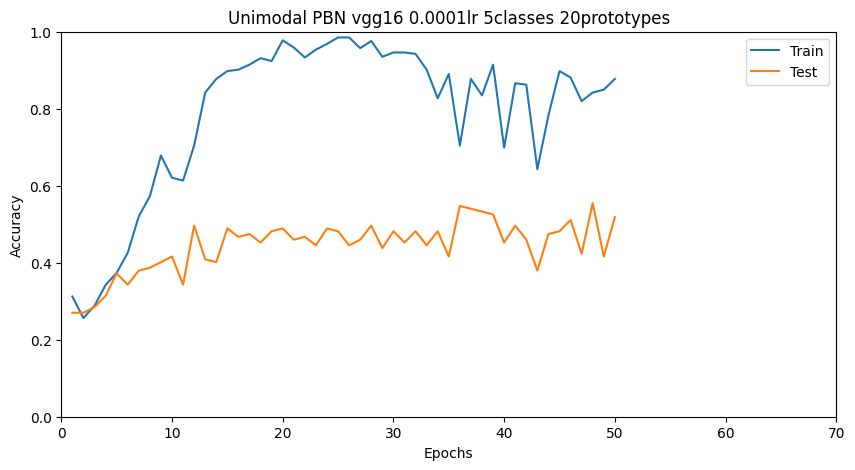

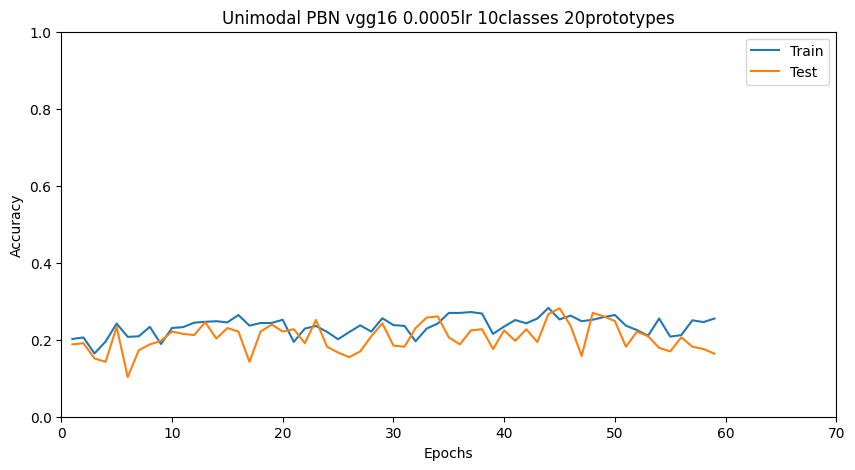

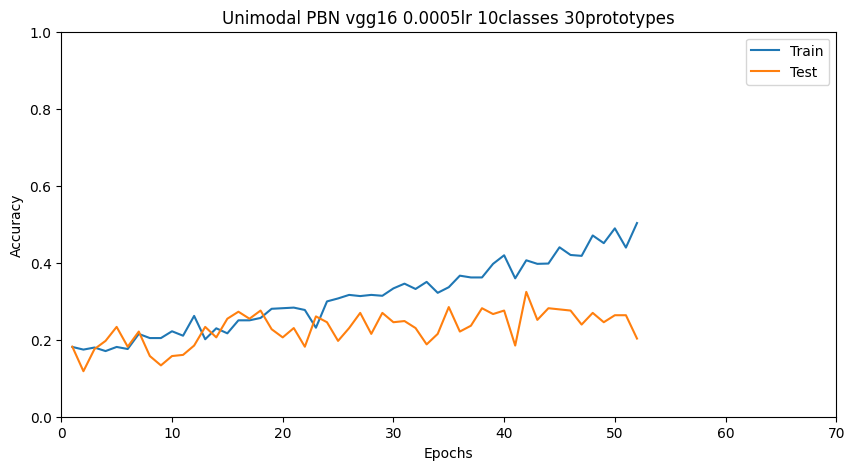

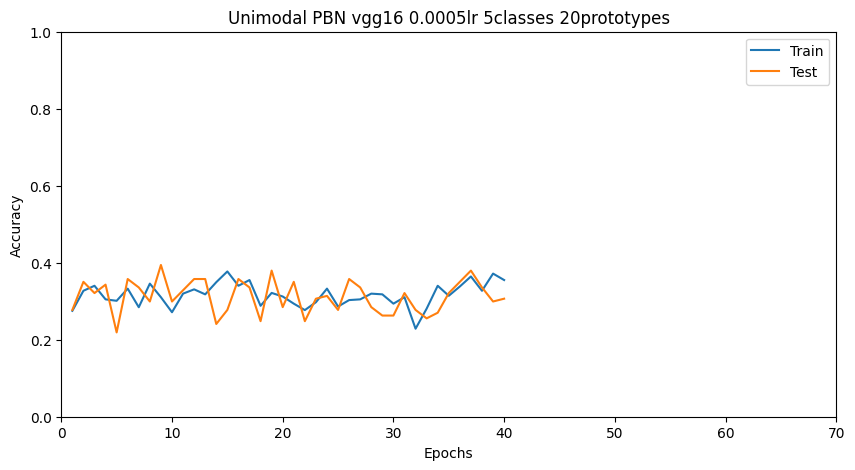

In [12]:
for low_lr_result in low_lr_results:
    encoder = low_lr_result.split("_")[1]
    lr = low_lr_result.split("-")[2]
    num_classes = low_lr_result.split("-")[3]
    num_prototypes = low_lr_result.split("-")[-1].replace(".csv", "")

    model_name = f"Unimodal PBN {encoder} {lr} {num_classes} {num_prototypes}"

    low_lr_result_csv = pd.read_csv(low_lr_result)

    train_accu = get_accuracy(low_lr_result_csv, 'train')
    test_accu = get_accuracy(low_lr_result_csv, 'test')

    plt.figure(figsize=(10,5))
    num_epochs = list(range(1, len(train_accu)+1))
    plt.plot(num_epochs, train_accu, label="Train")
    plt.plot(num_epochs, test_accu, label="Test")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.xlim(0,70)
    plt.ylim(0,1)
    plt.title(model_name)
    # plt.savefig(f'../plots/unimodal/{model_name}.png')
    plt.legend()
    plt.show()


#### 1.3.1 5 classes

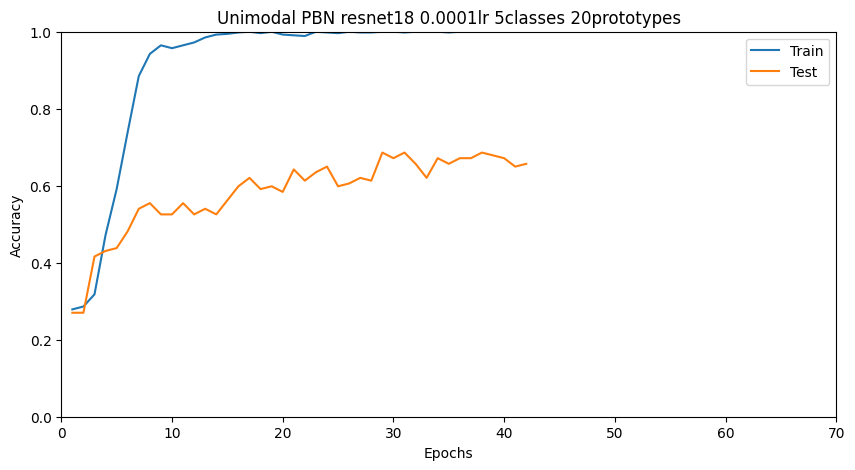

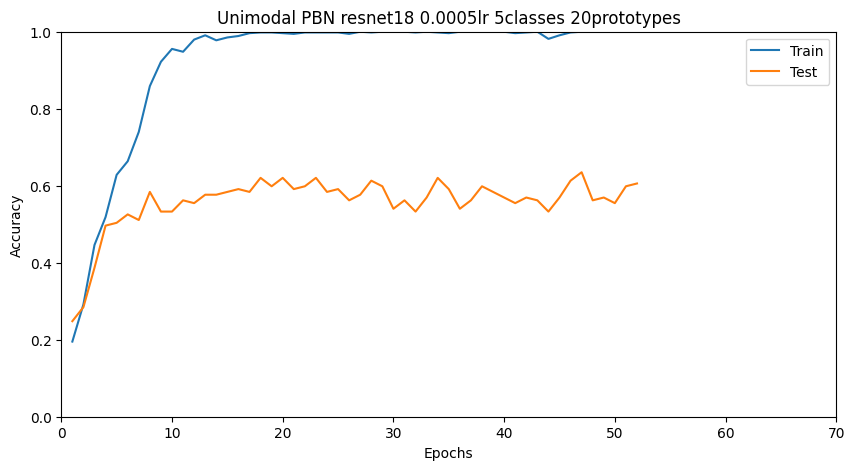

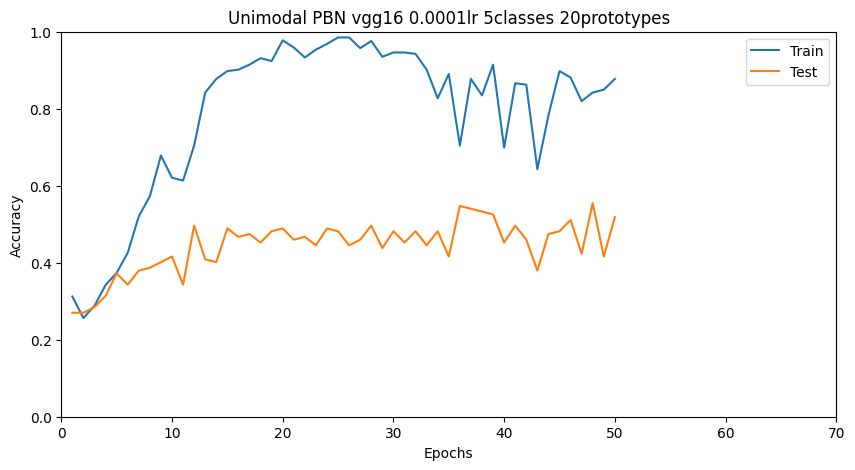

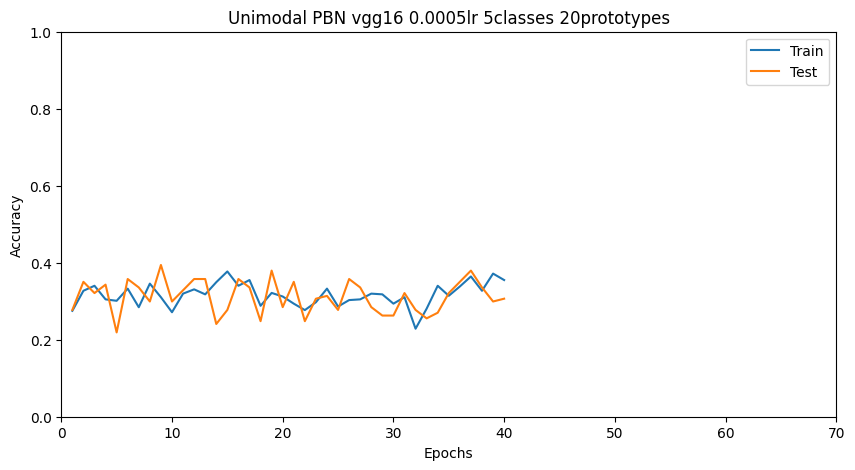

In [13]:
for low_lr_result in low_lr_5classes_results:
    encoder = low_lr_result.split("_")[1]
    lr = low_lr_result.split("-")[2]
    num_classes = low_lr_result.split("-")[3]
    num_prototypes = low_lr_result.split("-")[-1].replace(".csv", "")

    model_name = f"Unimodal PBN {encoder} {lr} {num_classes} {num_prototypes}"

    low_lr_result_csv = pd.read_csv(low_lr_result)

    train_accu = get_accuracy(low_lr_result_csv, 'train')
    test_accu = get_accuracy(low_lr_result_csv, 'test')

    plt.figure(figsize=(10,5))
    num_epochs = list(range(1, len(train_accu)+1))
    plt.plot(num_epochs, train_accu, label="Train")
    plt.plot(num_epochs, test_accu, label="Test")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.xlim(0,70)
    plt.ylim(0,1)
    plt.title(model_name)
    plt.legend()
    # plt.savefig(f'../plots/unimodal/{model_name}.png')
    plt.show()

In [14]:
for low_lr_result in low_lr_5classes_results:
    print(low_lr_result)

ProtoPNet_resnet18_80train-20test-0.0001lr-5classes-20prototypes.csv
ProtoPNet_resnet18_80train-20test-0.0005lr-5classes-20prototypes.csv
ProtoPNet_vgg16_80train-20test-0.0001lr-5classes-20prototypes.csv
ProtoPNet_vgg16_80train-20test-0.0005lr-5classes-20prototypes.csv


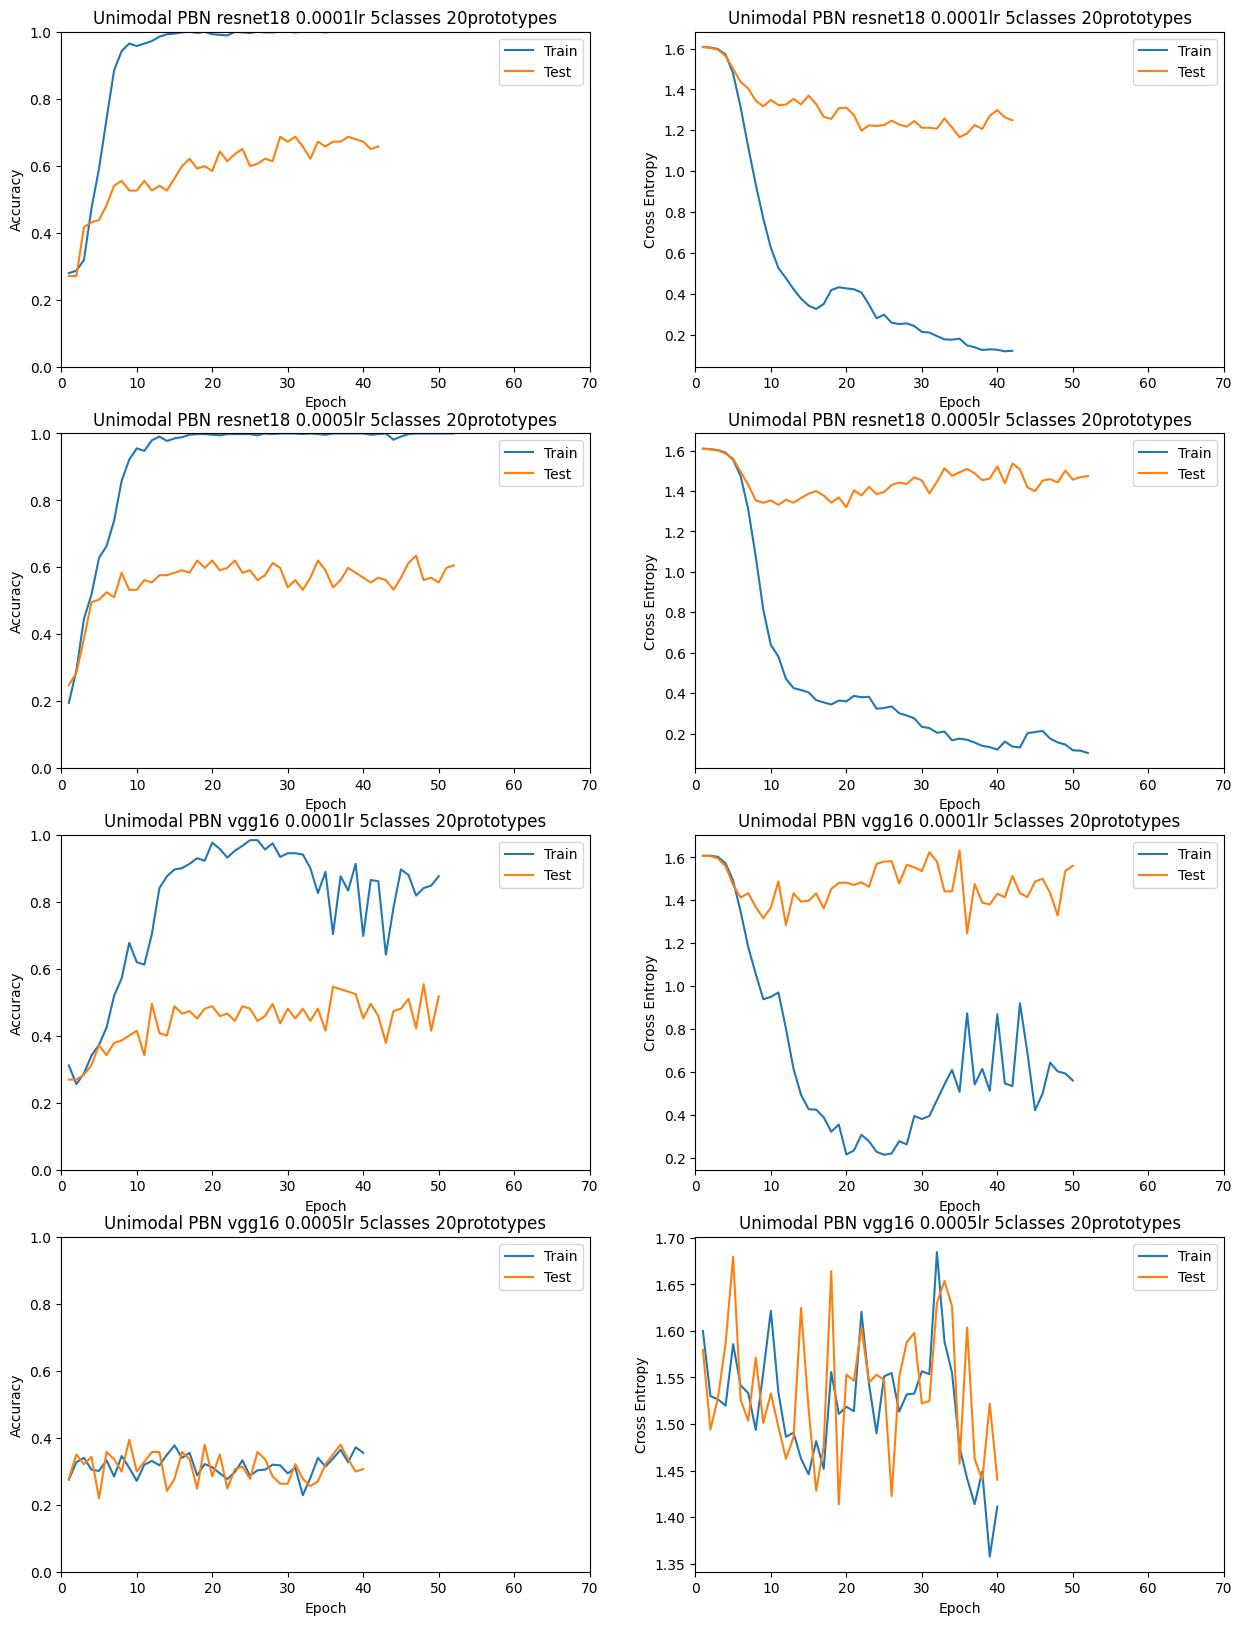

In [28]:
fig, ax = plt.subplots(4,2, figsize=(15,20))

ax0_filename = "ProtoPNet_resnet18_80train-20test-0.0001lr-5classes-20prototypes.csv"
ax1_filename = "ProtoPNet_resnet18_80train-20test-0.0005lr-5classes-20prototypes.csv"
ax2_filename = "ProtoPNet_vgg16_80train-20test-0.0001lr-5classes-20prototypes.csv"
ax3_filename = "ProtoPNet_vgg16_80train-20test-0.0005lr-5classes-20prototypes.csv"


generate_subplot(ax,ax0_filename, "Accuracy",0,0)
generate_subplot(ax,ax0_filename,"Cross Entropy", 0,1)
generate_subplot(ax,ax1_filename, "Accuracy",1,0)
generate_subplot(ax,ax1_filename,"Cross Entropy", 1,1)
generate_subplot(ax,ax2_filename, "Accuracy",2,0)
generate_subplot(ax,ax2_filename,"Cross Entropy", 2,1)
generate_subplot(ax,ax3_filename, "Accuracy",3,0)
generate_subplot(ax,ax3_filename,"Cross Entropy", 3,1)


# plt.savefig("../plots/unimodal/5classes.png")
plt.show()

#### 1.3.2 10 classes

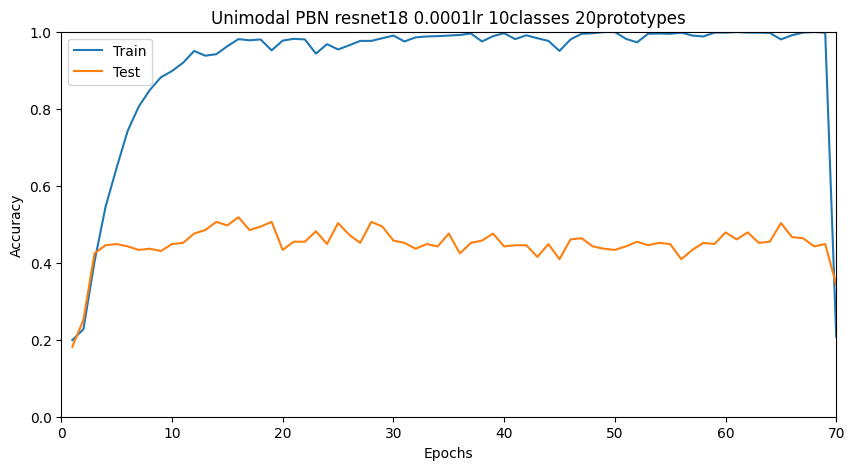

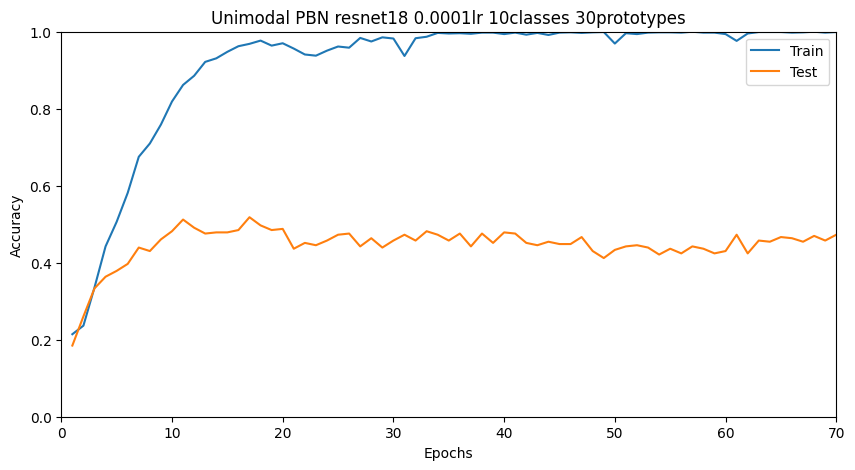

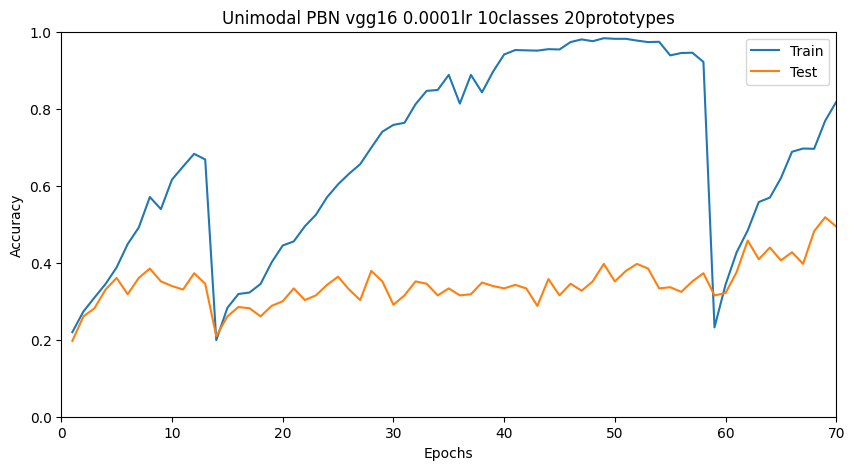

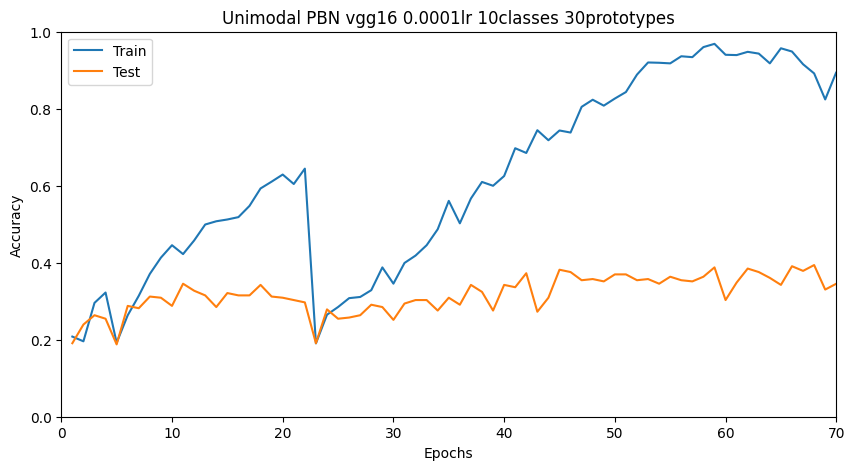

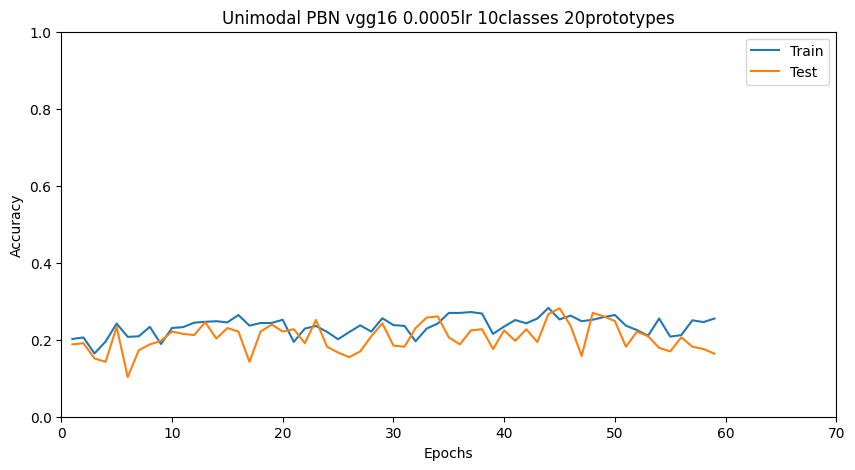

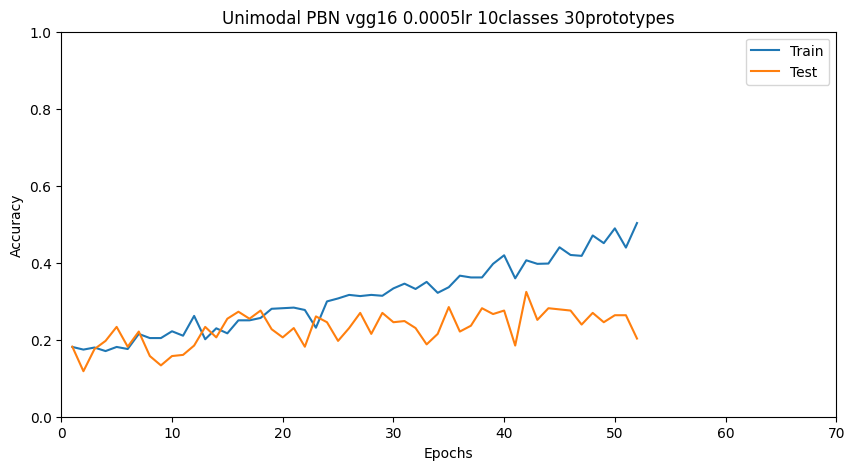

In [16]:
for low_lr_result in low_lr_10classes_results:
    encoder = low_lr_result.split("_")[1]
    lr = low_lr_result.split("-")[2]
    num_classes = low_lr_result.split("-")[3]
    num_prototypes = low_lr_result.split("-")[-1].replace(".csv", "")

    model_name = f"Unimodal PBN {encoder} {lr} {num_classes} {num_prototypes}"

    low_lr_result_csv = pd.read_csv(low_lr_result)

    train_accu = get_accuracy(low_lr_result_csv, 'train')
    test_accu = get_accuracy(low_lr_result_csv, 'test')

    plt.figure(figsize=(10,5))
    num_epochs = list(range(1, len(train_accu)+1))
    plt.plot(num_epochs, train_accu, label="Train")
    plt.plot(num_epochs, test_accu, label="Test")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.xlim(0,70)
    plt.ylim(0,1)
    plt.title(model_name)
    plt.legend()
    # plt_name = f"unimodal_{encoder}_{lr}_{num_classes}_{num_prototypes}.png"
    # plt.savefig(f'../plots/unimodal/{plt_name}')
    plt.show()

In [17]:
for low_lr_result in low_lr_10classes_results:
    print(low_lr_result)

ProtoPNet_resnet18_80train-20test-0.0001lr-10classes-20prototypes.csv
ProtoPNet_resnet18_80train-20test-0.0001lr-10classes-30prototypes.csv
ProtoPNet_vgg16_80train-20test-0.0001lr-10classes-20prototypes.csv
ProtoPNet_vgg16_80train-20test-0.0001lr-10classes-30prototypes.csv
ProtoPNet_vgg16_80train-20test-0.0005lr-10classes-20prototypes.csv
ProtoPNet_vgg16_80train-20test-0.0005lr-10classes-30prototypes.csv


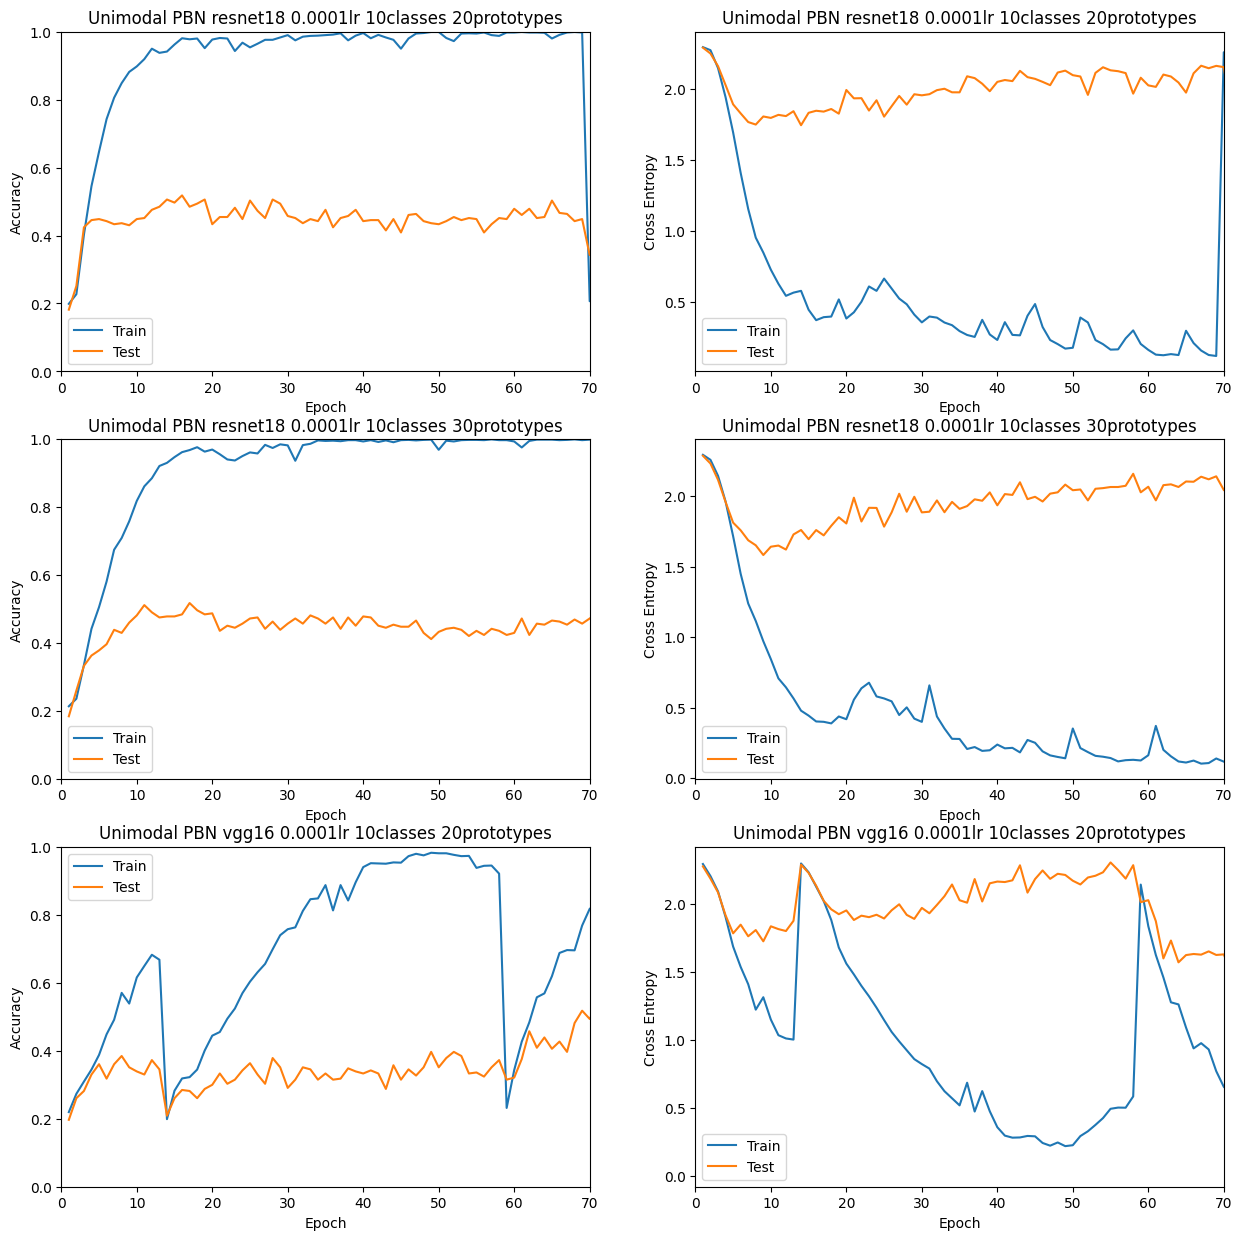

In [25]:
fig, ax = plt.subplots(3,2, figsize=(15,15))

ax0_filename = "ProtoPNet_resnet18_80train-20test-0.0001lr-10classes-20prototypes.csv"
ax1_filename = "ProtoPNet_resnet18_80train-20test-0.0001lr-10classes-30prototypes.csv"
ax2_filename = "ProtoPNet_vgg16_80train-20test-0.0001lr-10classes-20prototypes.csv"
ax3_filename = "ProtoPNet_vgg16_80train-20test-0.0001lr-10classes-30prototypes.csv"
ax4_filename = "ProtoPNet_vgg16_80train-20test-0.0005lr-10classes-20prototypes.csv"
ax5_filename = "ProtoPNet_vgg16_80train-20test-0.0005lr-10classes-30prototypes.csv"

generate_subplot(ax,ax0_filename,value_type="Accuracy", row_nr=0, col_nr=0)
generate_subplot(ax,ax0_filename,value_type="Cross Entropy", row_nr=0, col_nr=1)

generate_subplot(ax,ax1_filename,value_type="Accuracy", row_nr=1, col_nr=0)
generate_subplot(ax,ax1_filename,value_type="Cross Entropy", row_nr=1, col_nr=1)

generate_subplot(ax,ax2_filename,value_type="Accuracy", row_nr=2, col_nr=0)
generate_subplot(ax,ax2_filename,value_type="Cross Entropy", row_nr=2, col_nr=1)

# plt.savefig("../plots/unimodal/20classes.png")
plt.show()


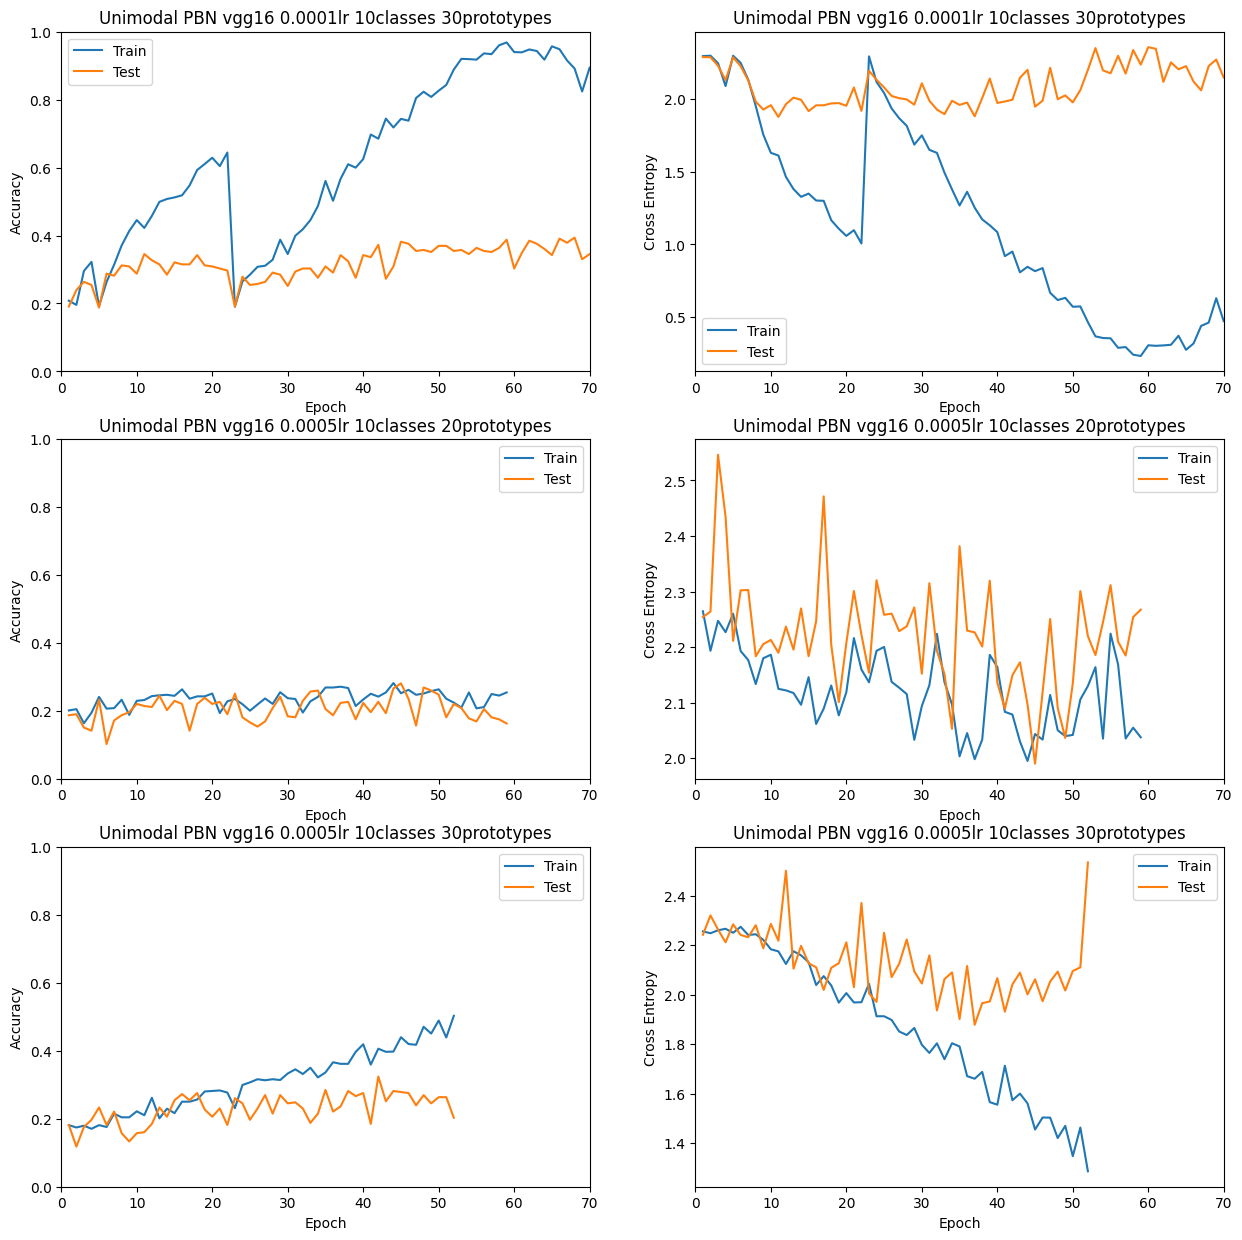

In [26]:
fig, ax = plt.subplots(3,2, figsize=(15,15))

ax0_filename = "ProtoPNet_resnet18_80train-20test-0.0001lr-10classes-20prototypes.csv"
ax1_filename = "ProtoPNet_resnet18_80train-20test-0.0001lr-10classes-30prototypes.csv"
ax2_filename = "ProtoPNet_vgg16_80train-20test-0.0001lr-10classes-20prototypes.csv"
ax3_filename = "ProtoPNet_vgg16_80train-20test-0.0001lr-10classes-30prototypes.csv"
ax4_filename = "ProtoPNet_vgg16_80train-20test-0.0005lr-10classes-20prototypes.csv"
ax5_filename = "ProtoPNet_vgg16_80train-20test-0.0005lr-10classes-30prototypes.csv"

generate_subplot(ax,ax3_filename,value_type="Accuracy", row_nr=0, col_nr=0)
generate_subplot(ax,ax3_filename,value_type="Cross Entropy", row_nr=0, col_nr=1)

generate_subplot(ax,ax4_filename,value_type="Accuracy", row_nr=1, col_nr=0)
generate_subplot(ax,ax4_filename,value_type="Cross Entropy", row_nr=1, col_nr=1)

generate_subplot(ax,ax5_filename,value_type="Accuracy", row_nr=2, col_nr=0)
generate_subplot(ax,ax5_filename,value_type="Cross Entropy", row_nr=2, col_nr=1)

# plt.savefig("../plots/unimodal/20classes.png")
plt.show()


#### 1.3.3 20 classes

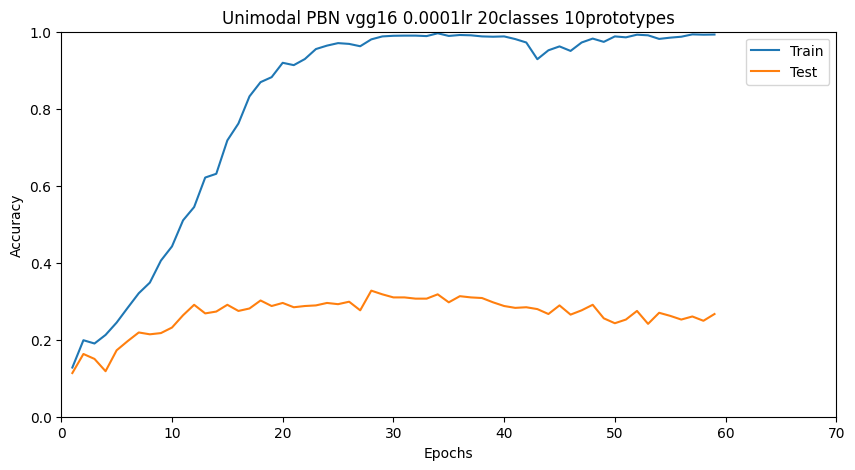

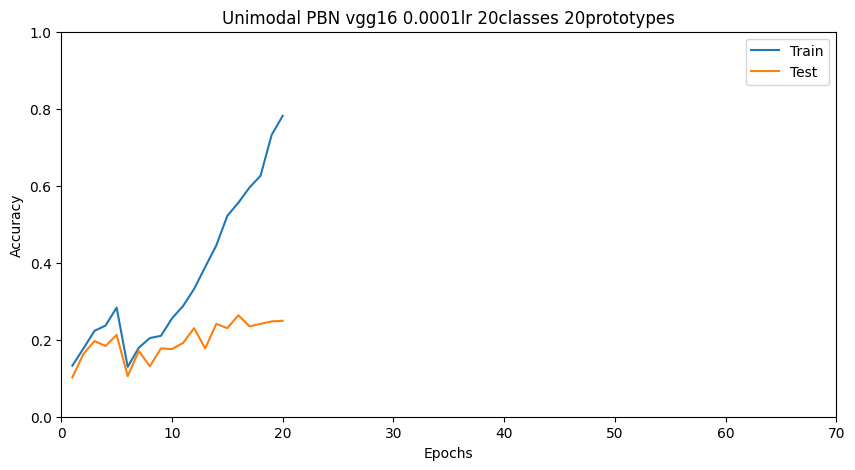

In [19]:
for low_lr_result in low_lr_20classes_results:
    encoder = low_lr_result.split("_")[1]
    lr = low_lr_result.split("-")[2]
    num_classes = low_lr_result.split("-")[3]
    num_prototypes = low_lr_result.split("-")[-1].replace(".csv", "")

    model_name = f"Unimodal PBN {encoder} {lr} {num_classes} {num_prototypes}"

    low_lr_result_csv = pd.read_csv(low_lr_result)

    train_accu = get_accuracy(low_lr_result_csv, 'train')
    test_accu = get_accuracy(low_lr_result_csv, 'test')

    plt.figure(figsize=(10,5))
    num_epochs = list(range(1, len(train_accu)+1))
    plt.plot(num_epochs, train_accu, label="Train")
    plt.plot(num_epochs, test_accu, label="Test")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.xlim(0,70)
    plt.ylim(0,1)
    plt.title(model_name)
    plt.legend()
    # plt_name = f"unimodal_{encoder}_{lr}_{num_classes}_{num_prototypes}.png"
    # plt.savefig(f'../plots/unimodal/{plt_name}')
    plt.show()

In [20]:
for low_lr_result in low_lr_20classes_results:
    print(low_lr_result)

ProtoPNet_vgg16_80train-20test-0.0001lr-20classes-10prototypes.csv
ProtoPNet_vgg16_80train-20test-0.0001lr-20classes-20prototypes.csv


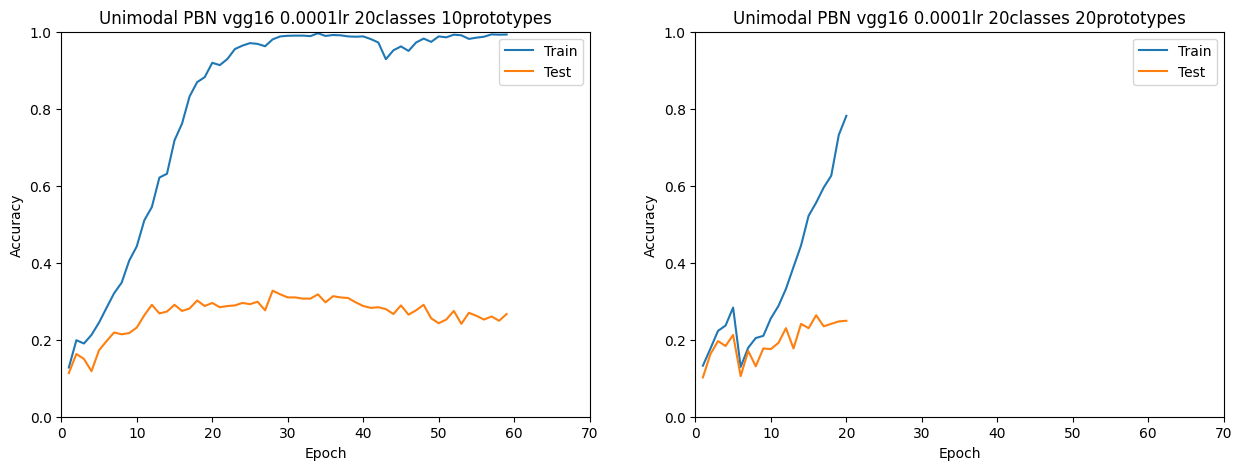

In [21]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax0_filename = "ProtoPNet_vgg16_80train-20test-0.0001lr-20classes-10prototypes.csv"
ax1_filename = "ProtoPNet_vgg16_80train-20test-0.0001lr-20classes-20prototypes.csv"
ax0_modelname = generate_unimodal_name(ax0_filename)
ax1_modelname = generate_unimodal_name(ax1_filename)

ax0_data = pd.read_csv(ax0_filename)
ax1_data = pd.read_csv(ax1_filename)

ax0_train_accu = get_accuracy(ax0_data, 'train')
ax0_test_accu = get_accuracy(ax0_data, 'test')
ax1_train_accu = get_accuracy(ax1_data, 'train')
ax1_test_accu = get_accuracy(ax1_data, 'test')
ax0_num_epochs = list(range(1, len(ax0_train_accu)+1))
ax1_num_epochs = list(range(1, len(ax1_train_accu)+1))

ax[0].plot(ax0_num_epochs,ax0_train_accu,label='Train')
ax[0].plot(ax0_num_epochs, ax0_test_accu, label='Test')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].set_title(ax0_modelname)
ax[0].set_xlim(0,70)
ax[0].set_ylim(0,1)
ax[0].legend()

ax[1].plot(ax1_num_epochs,ax1_train_accu,label='Train')
ax[1].plot(ax1_num_epochs, ax1_test_accu, label='Test')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_title(ax1_modelname)
ax[1].set_xlim(0,70)
ax[1].set_ylim(0,1)
ax[1].legend()

# plt.savefig("../plots/unimodal/20classes.png")
plt.show()


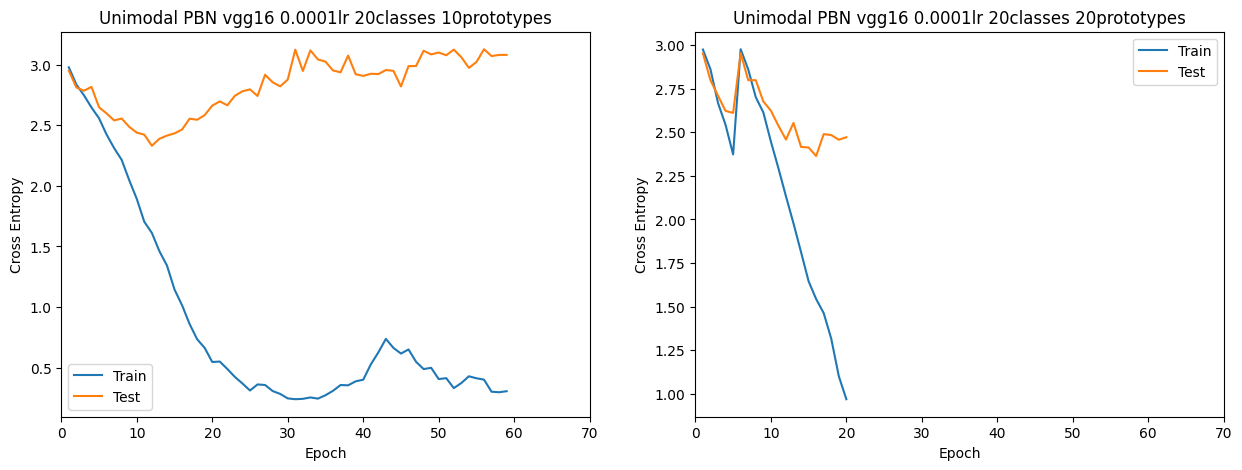

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax0_filename = "ProtoPNet_vgg16_80train-20test-0.0001lr-20classes-10prototypes.csv"
ax1_filename = "ProtoPNet_vgg16_80train-20test-0.0001lr-20classes-20prototypes.csv"

generate_subplot(ax,ax0_filename, value_type="Cross Entropy", row_nr=0, col_nr=0, onerow=True)
generate_subplot(ax,ax1_filename, value_type="Cross Entropy", row_nr=0, col_nr=1, onerow=True)

# plt.savefig("../plots/unimodal/20classes_crossentropy.png")
plt.show()

In [ ]:
### Next:
# 1. Make plots for losses
# 2. Make table for best test accuracy and lowest test cross entropy
# 3. Select the best model
# 4. Start implementing the multimodal PBN